In [1]:
import pandas as pd
from utils_error_analysis import *
import seaborn as sns
from utils_init import *

In [2]:
model_names =  ['bert','roberta','biobert','scibert']
folds = range(0,10)
datasets=['cafeteria','hansard','foodon','snomedct']
result_dir='results_10'
fold_dir='folds_10'
split='test'

In [3]:
merged_all_datasets=get_merged_all(datasets, model_names, folds, result_dir, fold_dir, split)
merged_all_datasets.to_csv(f'merged_datasets_{"_".join(datasets)}.csv')

parse_test_values took=0:00:00.090268 shape=(13832, 5)
parse_test_values took=0:00:00.062444 shape=(13293, 5)
parse_test_values took=0:00:00.070363 shape=(13122, 5)
parse_test_values took=0:00:00.055815 shape=(13223, 5)
parse_test_values took=0:00:00.057674 shape=(12458, 5)
parse_test_values took=0:00:00.058097 shape=(13678, 5)
parse_test_values took=0:00:00.063795 shape=(13234, 5)
parse_test_values took=0:00:00.050684 shape=(12986, 5)
parse_test_values took=0:00:00.065907 shape=(12867, 5)
parse_test_values took=0:00:00.070053 shape=(13575, 5)
parse_test_values took=0:00:00.063650 shape=(13832, 5)
parse_test_values took=0:00:00.068731 shape=(13293, 5)
parse_test_values took=0:00:00.064604 shape=(13124, 5)
parse_test_values took=0:00:00.066406 shape=(13223, 5)
parse_test_values took=0:00:00.054355 shape=(12458, 5)
parse_test_values took=0:00:00.068758 shape=(13678, 5)
parse_test_values took=0:00:00.066867 shape=(13234, 5)
parse_test_values took=0:00:00.065909 shape=(12986, 5)
parse_test

In [15]:
merged_all_datasets=pd.read_csv(f'merged_datasets_{"_".join(datasets)}.csv', index_col=[0])

/opt/conda/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [14]:
merged_all_datasets

,words,predictions,sentence_id,word_id,labels,full sentence,fold,model_name,dataset
0,The,O,0.0,0,O,The nutritional value of gluten - free product...,0,bert,cafeteria
1,nutritional,O,0.0,1,O,The nutritional value of gluten - free product...,0,bert,cafeteria
2,value,O,0.0,2,O,The nutritional value of gluten - free product...,0,bert,cafeteria
3,of,O,0.0,3,O,The nutritional value of gluten - free product...,0,bert,cafeteria
4,gluten,B,0.0,4,B,The nutritional value of gluten - free product...,0,bert,cafeteria
...,...,...,...,...,...,...,...,...,...
13570,development,O,4598.0,14,O,Many environmental and genetic factors are sus...,9,scibert,snomedct
13571,of,O,4598.0,15,O,Many environmental and genetic factors are sus...,9,scibert,snomedct
13572,the,O,4598.0,16,O,Many environmental and genetic factors are sus...,9,scibert,snomedct
13573,disease,O,4598.0,17,O,Many environmental and genetic factors are sus...,9,scibert,snomedct


In [6]:
model_formatted_names = {
    'bert': 'BERT',
    'roberta': 'RoBERTa',
    'scibert': 'SciBERT',
    'biobert': 'BioBERT'
}

In [7]:
all_results=[]
for dataset in datasets:
    for model_name in model_names:
        for fold in folds:
            #print(f'{dataset} - {model_name} - {fold}')
            merged = merged_all_datasets.query('dataset==@dataset and fold==@fold and model_name==@model_name')
            results = classification_report(merged['labels'],merged['predictions'], output_dict=True, zero_division=0)
            for class_name in results.keys():
                if class_name=='accuracy':
                    continue
                for metric in ['precision', 'recall', 'f1-score']:
                    all_results.append({'model': model_name, 'fold': fold, 'metric': metric, 'value':results[class_name][metric], 'class_name':class_name, 'dataset': dataset})
all_results=pd.DataFrame(all_results)

In [8]:
'''all_results_df=pd.DataFrame()
for dataset in datasets:
    for model_name in model_names:
        print(f'{dataset} - {model_name}')
        for fold in folds:
            merged = merged_all_datasets.query('dataset==@dataset and fold==@fold and model_name==@model_name')
            results = classification_report(merged['labels'],merged['predictions'], output_dict=True, zero_division=0)
            result_df = pd.DataFrame(results).T
            result_df['model']= model_name
            result_df['dataset']=dataset
            result_df['fold']=fold
            all_results_df=all_results_df.append(result_df)
all_results_df= all_results_df.reset_index().rename(columns={'index':'tag'})'''

"all_results_df=pd.DataFrame()\nfor dataset in datasets:\n    for model_name in model_names:\n        print(f'{dataset} - {model_name}')\n        for fold in folds:\n            merged = merged_all_datasets.query('dataset==@dataset and fold==@fold and model_name==@model_name')\n            results = classification_report(merged['labels'],merged['predictions'], output_dict=True, zero_division=0)\n            result_df = pd.DataFrame(results).T\n            result_df['model']= model_name\n            result_df['dataset']=dataset\n            result_df['fold']=fold\n            all_results_df=all_results_df.append(result_df)\nall_results_df= all_results_df.reset_index().rename(columns={'index':'tag'})"

/tmp/ipykernel_1951/2496668795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['model']=dataset_results['model'].apply(lambda x: model_formatted_names[x])


         fold     value
model                  
BERT      4.5  0.896219
BioBERT   4.5  0.905427
RoBERTa   4.5  0.896461
SciBERT   4.5  0.892348


/tmp/ipykernel_1951/2496668795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['model']=dataset_results['model'].apply(lambda x: model_formatted_names[x])


         fold     value
model                  
BERT      4.5  0.651636
BioBERT   4.5  0.661238
RoBERTa   4.5  0.661470
SciBERT   4.5  0.645123


/tmp/ipykernel_1951/2496668795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['model']=dataset_results['model'].apply(lambda x: model_formatted_names[x])


         fold     value
model                  
BERT      4.5  0.426033
BioBERT   4.5  0.434600
RoBERTa   4.5  0.421821
SciBERT   4.5  0.411126


/tmp/ipykernel_1951/2496668795.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['model']=dataset_results['model'].apply(lambda x: model_formatted_names[x])


         fold     value
model                  
BERT      4.5  0.540722
BioBERT   4.5  0.584477
RoBERTa   4.5  0.569126
SciBERT   4.5  0.543548


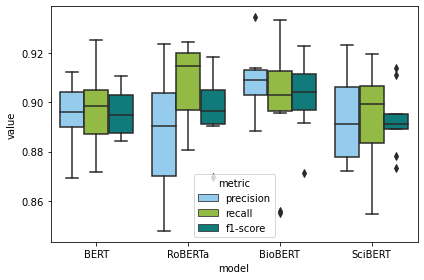

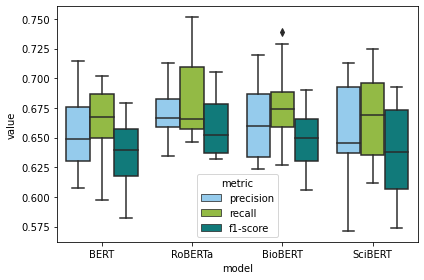

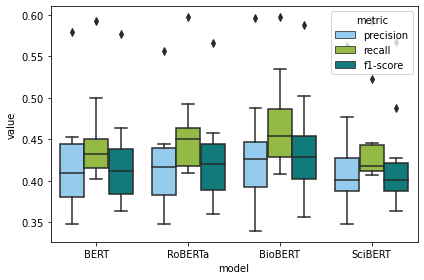

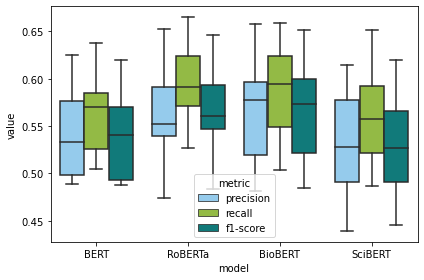

In [9]:
for dataset in datasets:
    plt.figure()
    dataset_results=all_results.query('dataset==@dataset and class_name=="macro avg"')
    dataset_results['model']=dataset_results['model'].apply(lambda x: model_formatted_names[x])
    print(dataset_results.groupby('model').median())
    sns.boxplot(data=dataset_results, x='model', y='value', hue='metric', palette=[ 'lightskyblue', "yellowgreen", "darkcyan"])
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset}_macro_boxplot.pdf')

In [10]:
def orient_df_for_pair_grid_model_row(dataset_results):
    dataset_results['class_name']=dataset_results['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))
    dataset_results=dataset_results.groupby(['model','metric','class_name','dataset']).median()['value'].reset_index()
    dataset_results=dataset_results.query("class_name not in ['O','macro avg','weighted avg','X','FOOD']")
    return dataset_results
def generate_plot_per_class_single_column(dataset,model_results_per_class_name):
    f=plt.figure(figsize=(8,16))
    sns.set_theme(style="whitegrid")
    model_results_per_class_name['model']=model_results_per_class_name['model'].apply(lambda x: model_formatted_names[x])

    print(model_results_per_class_name['class_name'].drop_duplicates().shape[0])
    sns.stripplot(data=model_results_per_class_name,size=10, dodge=True, orient="h", y="class_name", x="value", palette=[ 'lightskyblue', "yellowgreen", "darkcyan","grey"], linewidth=1, edgecolor="w", hue="model")
    f.axes[0].xaxis.grid(False)
    f.axes[0].yaxis.grid(True)
    plt.xlabel('Macro F1-Score', fontsize=16)
    plt.ylabel('Class', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset}_f1_per_class.pdf')

In [ ]:
for dataset in datasets:
    if dataset=='cafeteria':
        continue
    print(dataset)
    dataset_results=all_results.query('dataset==@dataset and metric=="f1-score"')
    
    model_results_per_class_name=orient_df_for_pair_grid_model_row(dataset_results)
    generate_plot_per_class_single_column(dataset,model_results_per_class_name)


hansard
69


/tmp/ipykernel_1951/2122519270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['class_name']=dataset_results['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))


foodon
618


/tmp/ipykernel_1951/2122519270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['class_name']=dataset_results['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))


/tmp/ipykernel_1951/2122519270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_results['class_name']=dataset_results['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))


       model    metric    class_name  dataset     value
0       bert  f1-score         AG.01  hansard  0.555274
1       bert  f1-score      AG.01.aa  hansard  0.285714
2       bert  f1-score      AG.01.ab  hansard  0.718750
3       bert  f1-score      AG.01.ac  hansard  0.923077
4       bert  f1-score      AG.01.ad  hansard  0.666667
..       ...       ...           ...      ...       ...
286  scibert  f1-score       AG.01.y  hansard  0.666667
287  scibert  f1-score    AG.01.y.01  hansard  0.826923
288  scibert  f1-score  AG.01.y.01.a  hansard  0.933673
289  scibert  f1-score  AG.01.y.01.b  hansard  1.000000
290  scibert  f1-score       AG.01.z  hansard  0.450000

[276 rows x 5 columns]
       model    metric                           class_name  dataset  \
0       bert  f1-score                         AG.01 [Food]  hansard   
1       bert  f1-score  AG.01.aa [Aerated/carbonated drink]  hansard   
2       bert  f1-score        AG.01.ab [Fruit juice/squash]  hansard   
3       bert  f1

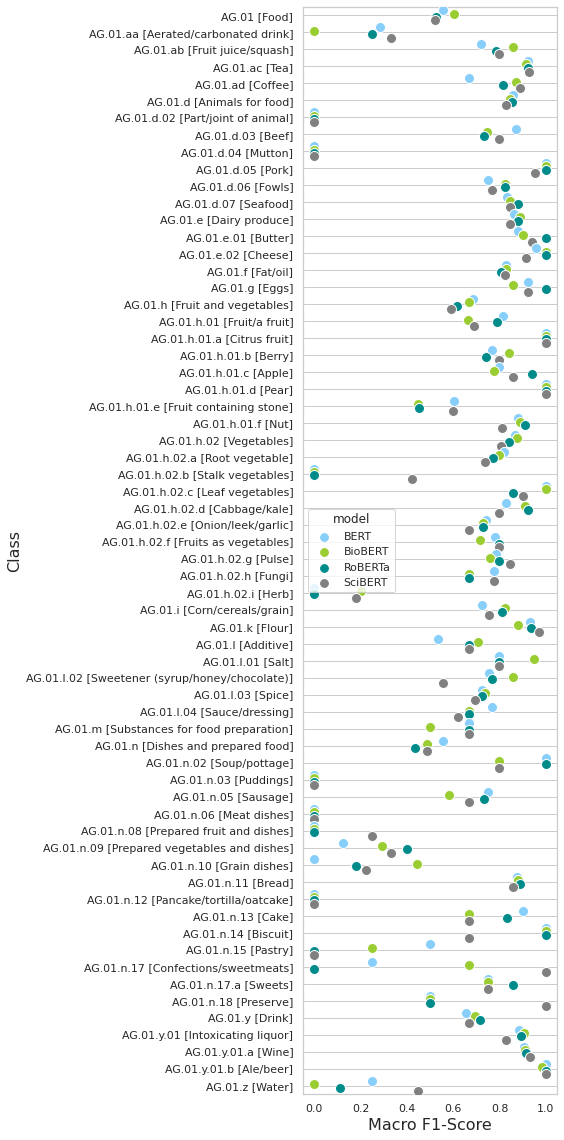

In [30]:
for dataset in ['hansard']:
    dataset_results=all_results.query('dataset==@dataset and metric=="f1-score"')
    
    model_results_per_class_name=orient_df_for_pair_grid_model_row(dataset_results)
    print(model_results_per_class_name)
    model_results_per_class_name=model_results_per_class_name.merge(hansard_mappings, left_on='class_name', how='left', right_on='pure tag')
    model_results_per_class_name['class_name']=model_results_per_class_name['Semantic Tags']
    print(model_results_per_class_name)
    generate_plot_per_class_single_column(dataset,model_results_per_class_name)


In [ ]:
def orient_df_for_pair_grid(dataset_results):
    dataset_results['class_name']=dataset_results['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))
    dataset_results=dataset_results.groupby(['model','metric','class_name','dataset']).median()['value'].reset_index()
    
    model_results_per_class_name=pd.DataFrame(index=dataset_results.set_index(['dataset','class_name']).index, columns=model_names)
    for (dataset,class_name, model), row in dataset_results.set_index(['dataset','class_name','model']).iterrows():
        model_results_per_class_name.loc[(dataset,class_name),model]=row['value']
    model_results_per_class_name=model_results_per_class_name.reset_index()
    #model_results_per_class_name['BI']=model_results_per_class_name['class_name'].apply(lambda x: x[0] if x[0] in ['B','I'] else None)
    #model_results_per_class_name['class_name']=model_results_per_class_name['class_name'].apply(lambda x: x.replace('B-','').replace('I-',''))
    model_results_per_class_name=model_results_per_class_name.query("class_name not in ['O','macro avg','weighted avg','X','FOOD']")
    return model_results_per_class_name

def generate_plot_per_class_multi_column(dataset,model_results_per_class_name):
    
    plt.figure()
    sns.set_theme(style="whitegrid")
    # Make the PairGrid

    g = sns.PairGrid(model_results_per_class_name.sort_values("class_name", ascending=False),
                     x_vars=model_names, y_vars=["class_name"], 
                      height=10, aspect=.25)


    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h", jitter=False,
          palette=["darkcyan"], linewidth=1, edgecolor="w")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 1), xlabel="F1 score", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = [ model_formatted_names[model_name] for model_name in model_names]

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
    plt.savefig(f'visualizations/{dataset}_f1_per_class_columns.pdf')

In [ ]:
for dataset in datasets:
    if dataset=='cafeteria':
        continue
    print(dataset)
    dataset_results=all_results.query('dataset==@dataset and metric=="f1-score"')
    
    model_results_per_class_name=orient_df_for_pair_grid(dataset_results)
    generate_plot_per_class_multi_column(dataset,model_results_per_class_name)
